# Power Plant Energy

___

## Description

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the plant was set to work with a full load. The dataset consists of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

Features consist of hourly average ambient variables

* Temperature (T) in the range 1.81°C and 37.11°C,
* Ambient Pressure (AP) in the range 992.89-1033.30 millibar,
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
* Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

[Data Source](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant)

___

## Goals

The goal of this assignment is to build model which can predict the EP (electrical energy output), using two methods and compare the results: 
* Method 1. Multiple Regression and,
* Method 2. SVM Regression.
___

## Importing Libraries

In [26]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# Data Preprocessing
___

## Importing the Data

In [27]:
rawData = pd.read_csv("data.csv")

## Checking the Dataset

In [28]:
rawData

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## Reviewing the Data

In [29]:
#Geneeral Check
rawData.info()

#Check for zeros
print('\n\n\n', 'Zero Check:',
     min(rawData.iloc[:,1].values),
     min(rawData.iloc[:,2].values),
     min(rawData.iloc[:,3].values),
     min(rawData.iloc[:,4].values),
     min(rawData.iloc[:,-1].values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ambient Temperature (C)               9568 non-null   float64
 1   Exhaust Vacuum (cm Hg)                9568 non-null   float64
 2   Ambient Pressure (milibar)            9568 non-null   float64
 3   Relative Humidity (%)                 9568 non-null   float64
 4   Hourly Electrical Energy output (MW)  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB



 Zero Check: 25.36 992.89 25.56 420.26 420.26


### General Sample Statistics
The following table describes the center and spread of each data column.

In [30]:
rawData.describe()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Plotting the Raw Data
We can further analyze the data by plotting histograms for each dataset feature.

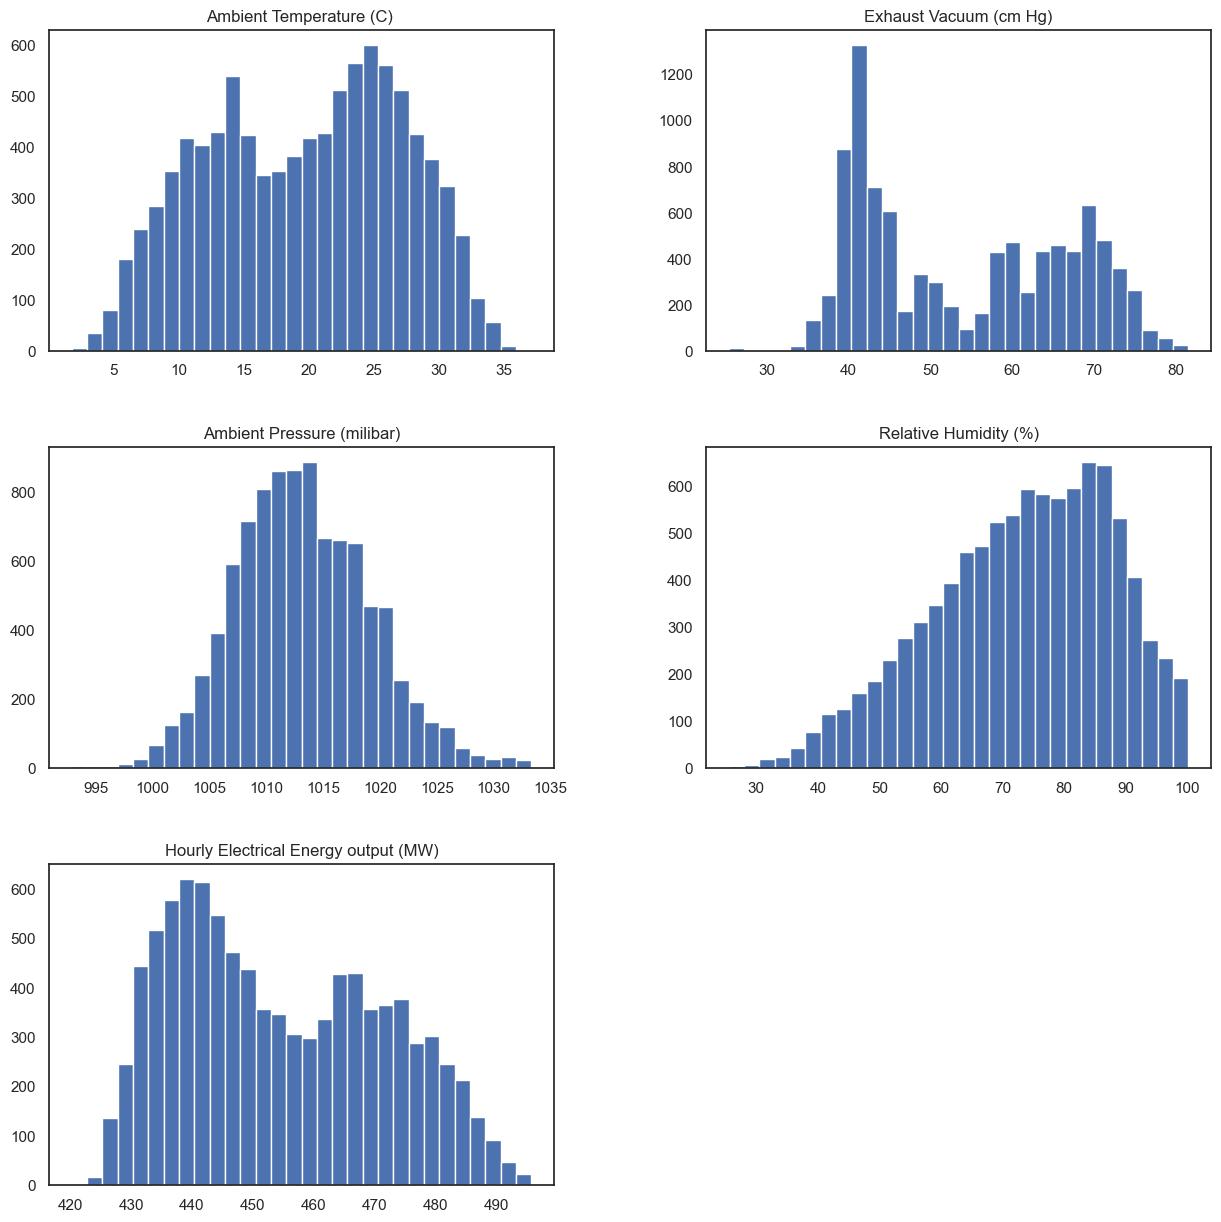

In [31]:
rawData.hist(bins=30, figsize=(15,15), grid=False);

### General Correlations

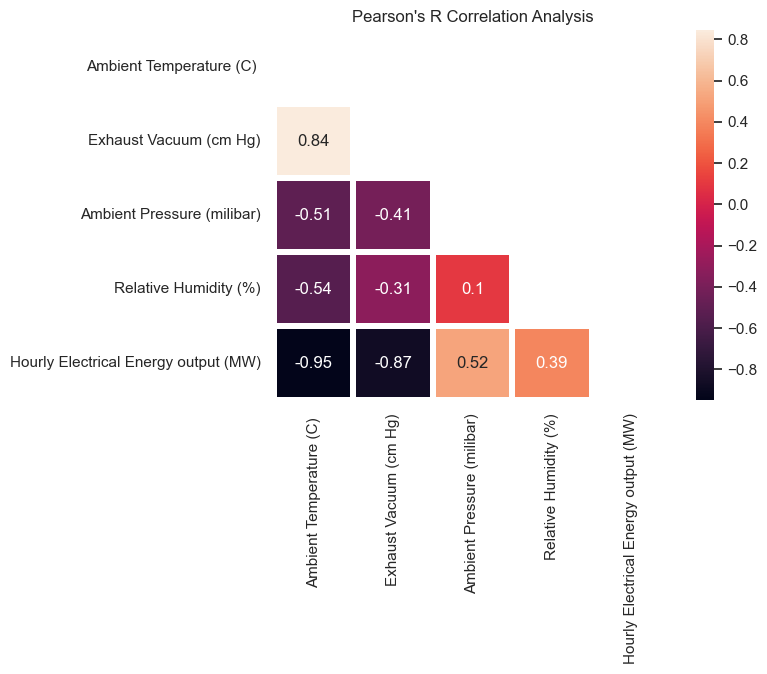

In [32]:
corr_mat = rawData.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(dpi=100)
plt.title("Pearson's R Correlation Analysis")
sns.heatmap(corr_mat, mask=mask, annot=True, lw=3, linecolor='white', cmap='rocket');

Some initial correlations can be seen in the above figure, such as the fact that both _Ambient Temperature_ and _Exhaust Vacuum_ are strongly negatively proportional to Energy Output.  

### Note
It can be seen that all the data is non-null, numerical, and non-zero. Thus, no imputing or encoding is necessary.

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
scaledData = ss1.fit_transform(rawData)
pd.DataFrame(scaledData)

,0,1,2,3,4
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666
...,...,...,...,...,...
9563,-0.402737,-0.363242,0.126450,1.211755,0.331944
9564,-0.867037,-1.190331,1.753131,-0.447205,0.893877
9565,1.565840,1.575811,-0.057099,-2.522618,-1.452881
9566,0.647976,1.191778,0.101191,-0.747901,-1.091345


## Splitting the Dataset

In [34]:
X = scaledData[:,:-1]
y = scaledData[:, -1]

## Checking the Split

In [35]:
#pd.DataFrame(X)
pd.DataFrame(y)

,0
0,0.521208
1,-0.585664
2,2.003679
3,-0.462028
4,1.144666
...,...
9563,0.331944
9564,0.893877
9565,-1.452881
9566,-1.091345


## Train and Test Split 

In [36]:
from sklearn.model_selection import train_test_split
#See note on section 5 for explanation of why a predetermined random seed was omitted.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
#pd.DataFrame(X_test)

# Method 1 - Multiple Regression
___
## Train the model

In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression();
linreg.fit(X_train, y_train);

## Predict the Outcome

In [38]:
Y_pred_lin = linreg.predict(X_test);

## Evaluate the Model

In [39]:
from sklearn.metrics import mean_squared_error
linear_model_rmse = mean_squared_error(y_test, Y_pred_lin) ** (1/2)
print("{:.5f}".format(linear_model_rmse))

0.26754


# Method 2 - Epsilon-Support Vector Regression.
___
## Train the Model

In [40]:
from sklearn.svm import SVR
esvr = SVR();
#esvr.fit(XScaled, yScaled); *** See below ***
esvr.fit(X, y);

## Predict the Outcome

In [41]:
#Scaling *** This results in an ususually large error ***
#Y_pred_esvr_sc = esvr.predict(sc_inputs.transform(X_test))
#Y_pred_esvr = sc_output.inverse_transform(Y_pred_esvr_sc)

#No scaling
Y_pred_esvr = esvr.predict(X_test)

## Evaluate the Model

In [42]:
esvr_model_rmse = mean_squared_error(y_test, Y_pred_esvr) ** (1/2)
print("{:.5f}".format(esvr_model_rmse))

0.23155


# Comparing each Model's Relative Performance

We now use two metrics to compare the relative performance of both methods
1. RMSE - Root Mean Squared Error
1. MAPE - Mean absolute Percent Error

Note: The entire notebook was run several times in order to ensure that the conclusions reached in this section were not biased to one particular random state (seed) on the **train_test_split** method from the **sklearn.model_selection** module
___

## RMSE

Signed percent diff between RMSEs [%] = -13.452236058995364


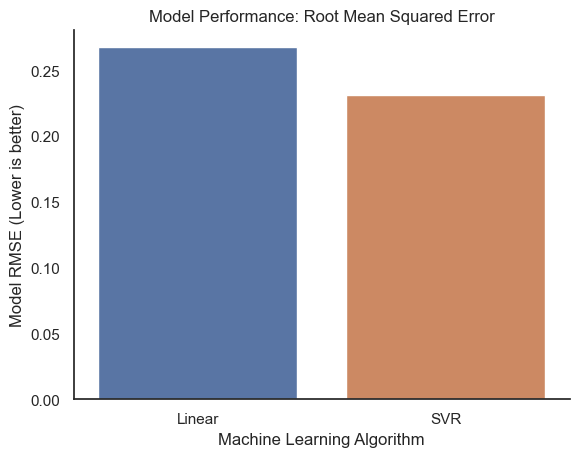

In [43]:
import seaborn as sns
sns.set_theme(style="white")
sns.color_palette("bright")

ax = sns.barplot(x=["Linear", "SVR"], y=[linear_model_rmse, esvr_model_rmse])
ax.set(xlabel="Machine Learning Algorithm", ylabel="Model RMSE (Lower is better)", 
       title="Model Performance: Root Mean Squared Error");
sns.despine()

#Signed percent diff between RMSEs
print('Signed percent diff between RMSEs [%] =',(esvr_model_rmse - linear_model_rmse)/linear_model_rmse * 100
)

## MAPE

Signed percent difference between MAPEs [%] = -5.187799546247798


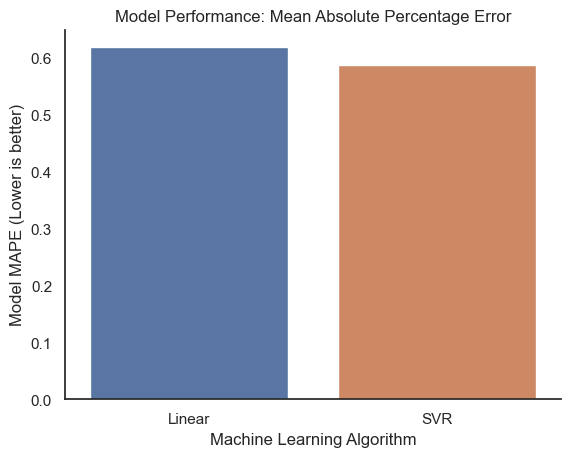

In [44]:
from sklearn.metrics import mean_absolute_percentage_error

ax2 = sns.barplot(x=["Linear", "SVR"], 
                  y=[mean_absolute_percentage_error(y_test, Y_pred_lin), 
                      mean_absolute_percentage_error(y_test, Y_pred_esvr)],)
ax2.set(xlabel="Machine Learning Algorithm",
        ylabel="Model MAPE (Lower is better)", 
        title="Model Performance: Mean Absolute Percentage Error");
sns.despine();

#signed percent difference between MAPEs
print('Signed percent difference between MAPEs [%] =',(mean_absolute_percentage_error(y_test, Y_pred_esvr) - mean_absolute_percentage_error(y_test, Y_pred_lin))/mean_absolute_percentage_error(y_test, Y_pred_esvr) * 100)

# Conclusion
___

After multiple model performance evaluations with different random states, it was observed that -on average- **the SVM model outperformed the linear model across both evaluation metrics**.

Both error rates are small when compared against the test values, thus both models can be recommended for deployment. I.e., when observing the model's performance individually, each's individual rates are acceptable. However, **the SVM model would be the best choice for deployment** due to it outerforming the linear model for almost every random state of the train/test split.

Sensitivity analysis should be performed methodically, not only for measuring the models' individual performance, but also their relative performance. This could be done, for example, by varying the train/test split's random state and recording model performance data for several runs.